<a href="https://colab.research.google.com/github/carolshayle/Python/blob/main/SSA_Levels_Per_Continent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving world-administrative-boundaries.cpg to world-administrative-boundaries.cpg
Saving world-administrative-boundaries.dbf to world-administrative-boundaries.dbf
Saving world-administrative-boundaries.prj to world-administrative-boundaries.prj
Saving world-administrative-boundaries.sbn to world-administrative-boundaries.sbn
Saving world-administrative-boundaries.sbx to world-administrative-boundaries.sbx
Saving world-administrative-boundaries.shp to world-administrative-boundaries.shp
Saving world-administrative-boundaries.shp.xml to world-administrative-boundaries.shp.xml
Saving world-administrative-boundaries.shx to world-administrative-boundaries.shx
User uploaded file "world-administrative-boundaries.cpg" with length 5 bytes
User uploaded file "world-administrative-boundaries.dbf" with length 589154 bytes
User uploaded file "world-administrative-boundaries.prj" with length 143 bytes
User uploaded file "world-administrative-boundaries.sbn" with length 2884 bytes
User uploaded file

Error reading shapefile: your_shapefile.shp: No such file or directory
Please ensure all shapefile components (.shp, .shx, .dbf, etc.) are uploaded and 'your_shapefile.shp' is the correct name.


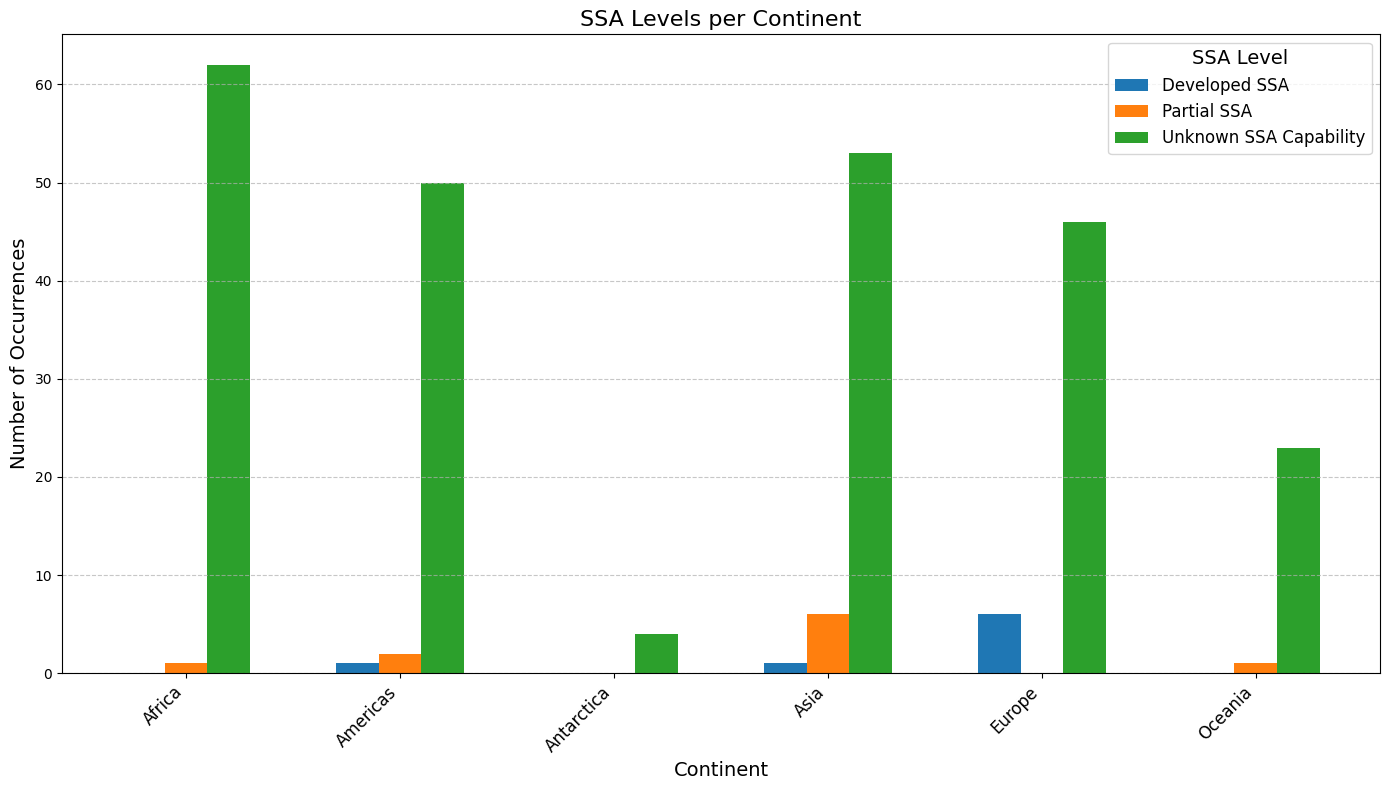

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy for potential NaN handling

# Assuming you've already uploaded your shapefile as described previously
# and it's named 'your_shapefile.shp'

try:
    gdf = gpd.read_file('your_shapefile.shp')
except Exception as e:
    print(f"Error reading shapefile: {e}")
    print("Please ensure all shapefile components (.shp, .shx, .dbf, etc.) are uploaded and 'your_shapefile.shp' is the correct name.")
    # Exit or handle the error gracefully if the file isn't found
    exit() # Exit if the shapefile cannot be read

# Check if the required columns exist
required_columns = ['SSA_Level', 'continent']
if not all(col in gdf.columns for col in required_columns):
    print(f"Error: Missing one or more required columns ({required_columns}) in the shapefile.")
else:
    # Group by continent and SSA_Level, then count occurrences
    ssa_counts = gdf.groupby(['continent', 'SSA_Level']).size().unstack(fill_value=0)

    # Ensure all expected SSA levels are present as columns, fill with 0 if not
    # This step is crucial if some continents don't have all SSA_Levels
    # Replace 'Level1', 'Level2', 'Level3' with your actual SSA_Level names
    expected_ssa_levels = sorted(gdf['SSA_Level'].unique()) # Get unique levels from your data
    for level in expected_ssa_levels:
        if level not in ssa_counts.columns:
            ssa_counts[level] = 0
    ssa_counts = ssa_counts[expected_ssa_levels] # Order columns

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 8))

    # Define bar width and positions
    bar_width = 0.2
    n_levels = len(expected_ssa_levels)
    index = np.arange(len(ssa_counts.index)) # Position for each continent

    # Plot each SSA_Level as a separate bar
    for i, level in enumerate(expected_ssa_levels):
        # Calculate the position for each bar group
        bar_position = index + (i - (n_levels - 1) / 2) * bar_width
        ax.bar(bar_position, ssa_counts[level], bar_width, label=level)

    ax.set_title('SSA Levels per Continent', fontsize=16)
    ax.set_xlabel('Continent', fontsize=14)
    ax.set_ylabel('Number of Occurrences', fontsize=14)
    ax.set_xticks(index)
    ax.set_xticklabels(ssa_counts.index, rotation=45, ha='right', fontsize=12)
    ax.legend(title='SSA Level', fontsize=12, title_fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()